In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os

plt.rcParams['figure.figsize'] = (10.0, 10.0)

In [5]:
path='/mnt/e/Cryo-TCR/data/TCR_data/res/vdjtools/'
os.chdir(path)

In [6]:
input_path='./'#输入路径
output_path='./'#输出路径
sample_info='../metadata.txt'#记录有样本分组的样本信息
file_suffix='.clonotypes.ALL.txt' #数据文件的后缀名

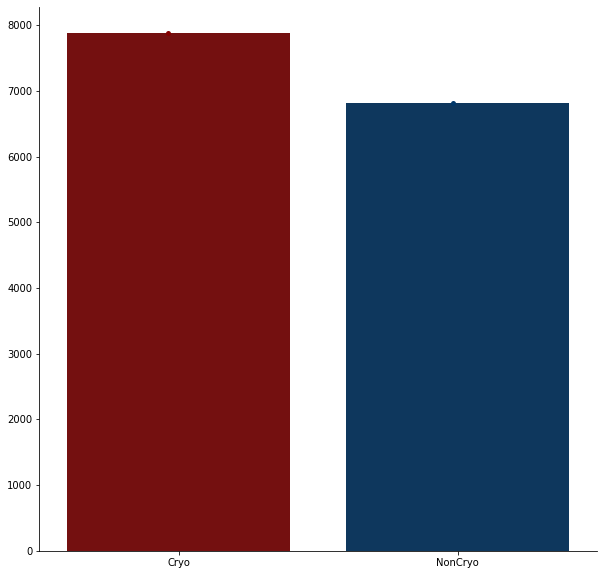

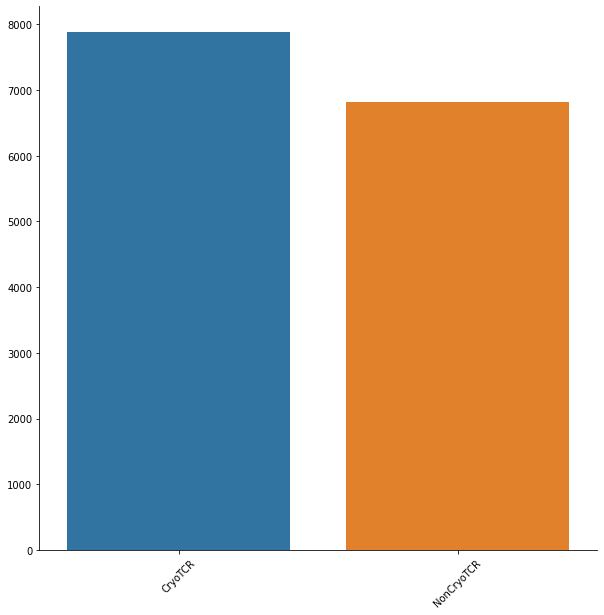

In [13]:
list_pos=[]
for line in open(input_path+sample_info,'r'):
    info=line[:-1].split('\t')
    if info[0]!='Sample':
        if str(info[1])=='Cryo':
            list_pos.append(info[0])

list_class=[]
list_sample=[]
list_richness=[]
for line in open(output_path+'basicstats.txt','r'):
    info=line[:-1].split('\t')
    if info[0]!='sample_id':
        if info[0].split('.')[0] in list_pos:
            list_class.append('Cryo')
        else:
            list_class.append('NonCryo')
        list_sample.append(info[0].split('.')[0])
        list_richness.append(float(info[3]))

ax1 = sns.barplot(x=list_class,y=list_richness,capsize=.2,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1_1 = sns.stripplot(x=list_class,y=list_richness,size=5,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig(output_path+'Richness_barplot_Group.pdf')
plt.show()
ax2 = sns.barplot(x=list_sample,y=list_richness)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.savefig(output_path+'Richness_barplot_Sample.pdf')
plt.show()

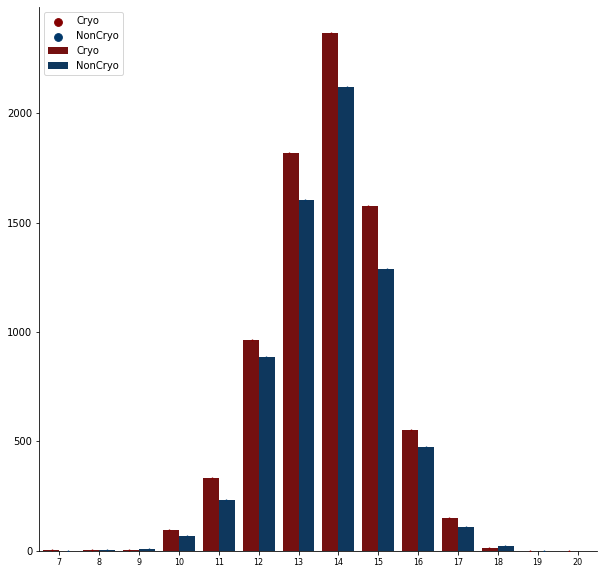

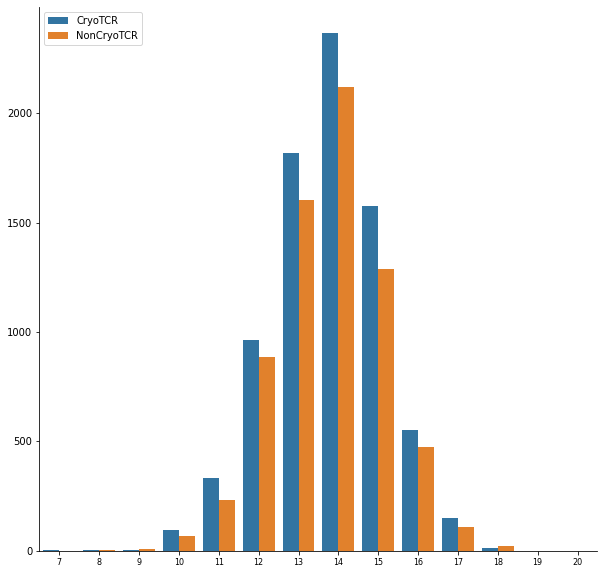

In [14]:
dict_sample_LengthCount={}
list_pos=[]
for line in open(input_path+sample_info,'r'):
    info=line[:-1].split('\t')
    id=info[0]
    if id!='Sample':
        if str(info[1])=='Cryo':
            list_pos.append(id)
        read_file=open(input_path+id+'.clonotypes.ALL.txt','r')
        dict_length_count={}
        for line in read_file:
            if line[0]!='c':
                length=len(line[:-1].split('\t')[3])
                if length < 30:
                    if length not in dict_length_count.keys():
                        dict_length_count[length]=1
                    else:
                        dict_length_count[length]+=1
        dict_sample_LengthCount[id]=dict_length_count
        read_file.close()

list_length=[]
list_class=[]
list_sample=[]
list_count=[]
for sample in dict_sample_LengthCount.keys():
    dict_length_count=dict_sample_LengthCount[sample]
    for length in dict_length_count.keys():
        list_length.append(length)
        list_sample.append(sample)
        if sample in list_pos:
            list_class.append('Cryo')
        else:
            list_class.append('NonCryo')
        list_count.append(dict_length_count[length])

ax1 = sns.barplot(x=list_length,y=list_count,hue=list_class,errwidth=0.5,capsize=0.5,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1_1 = sns.stripplot(x=list_length,y=list_count,hue=list_class,size=2,dodge=True,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0,fontsize=8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig(output_path+'Length_barplot_Class.pdf')
plt.show()
ax2 = sns.barplot(x=list_length,y=list_count,hue=list_sample,errwidth=0.5,capsize=0.5)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0,fontsize=8)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.savefig(output_path+'Length_barplot_Sample.pdf')
plt.show()

{'CryoTCR': {'1': 78.002030972328, '2-3': 16.33663366336634, '4-10': 5.191673013455192, '11-30': 0.46966235085046965, '31-100': 0.0, '101-MAX': 0.0}, 'NonCryoTCR': {'1': 82.95904887714663, '2-3': 14.501687949508293, '4-10': 2.363129311610157, '11-30': 0.14677821811243214, '31-100': 0.02935564362248642, '101-MAX': 0.0}}


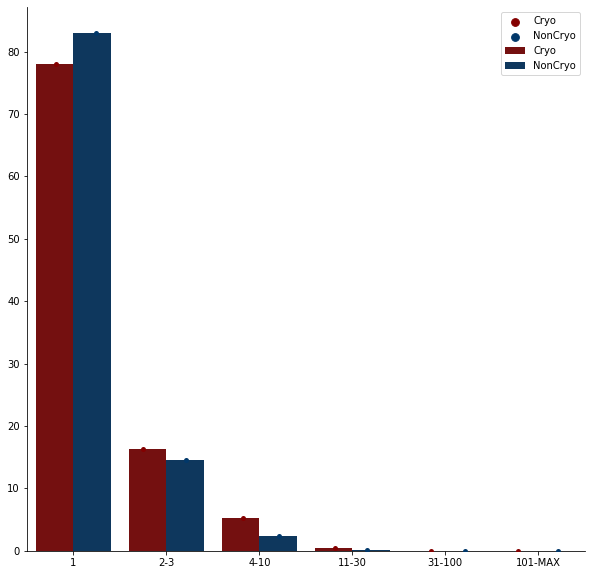

[78.00203097 82.95904888]


/home/wky/.local/lib/python3.6/site-packages/ipykernel_launcher.py:104: UserWarning: FixedFormatter should only be used together with FixedLocator


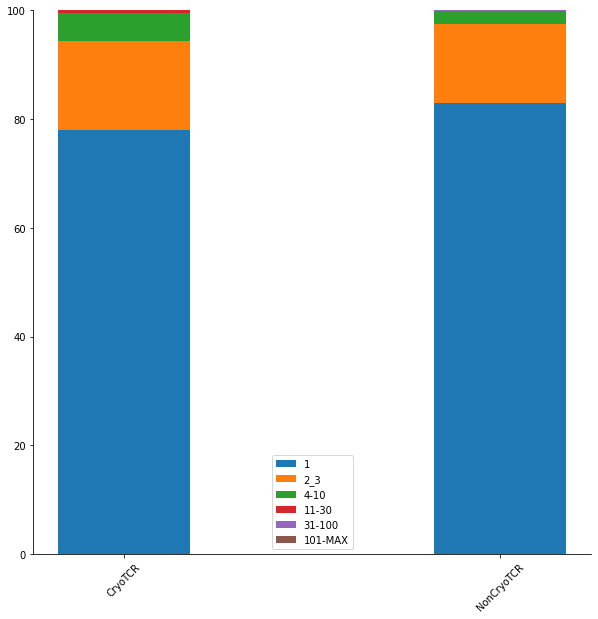

In [15]:
dict_sample_ReadsCounts={}
list_pos=[]
for line in open(input_path+sample_info,'r'):
    info = line[:-1].split('\t')
    id = info[0]
    if id != 'Sample':
        if str(info[1]) == 'Cryo':
            list_pos.append(id)
        read_file = open(input_path + id + '.clonotypes.All.txt', 'r')
        dict_read_count={'1':0,'2-3':0,'4-10':0,'11-30':0,'31-100':0,'101-MAX':0}
        number_clonotypes=0
        for line in read_file:
            if line[0] != 'c':
                number_clonotypes+=1
                info=line[:-1].split('\t')
                count=info[0]
                if int(count) == 1:
                    dict_read_count['1']+=1
                elif int(count) in [2,3]:
                    dict_read_count['2-3']+=1
                elif 4 <= int(count) <= 10:
                    dict_read_count['4-10']+=1
                elif 11 <= int(count) <= 30:
                    dict_read_count['11-30']+=1
                elif 31 <= int(count) <= 100:
                    dict_read_count['31-100']+=1
                elif int(count) >= 101:
                    dict_read_count['101-MAX']+=1
        for key in dict_read_count:
            dict_read_count[key]=dict_read_count[key]/number_clonotypes*100
        dict_sample_ReadsCounts[id]=dict_read_count
        read_file.close()

list_sample=[]
list_class=[]
list_read=[]
list_count=[]
dict_read_SampleCount={'1': {},'2-3': {},'4-10': {},'11-30': {},'31-100': {},'101-MAX': {}}
print(dict_sample_ReadsCounts)
for sample in dict_sample_ReadsCounts.keys():
    dict_read_count=dict_sample_ReadsCounts[sample]
    for read in dict_read_count.keys():
        list_sample.append(sample)
        if sample in list_pos:
            list_class.append('Cryo')
        else:
            list_class.append('NonCryo')
        list_read.append(read)
        count=float(dict_read_count[read])
        list_count.append(count)
        dict_sample_count=dict_read_SampleCount[read]
        dict_sample_count[sample]=count
        dict_read_SampleCount[read]=dict_sample_count

ax1 = sns.barplot(x=list_read,y=list_count,hue=list_class,errwidth=1,capsize=0.2,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1_1 = sns.stripplot(x=list_read,y=list_count,hue=list_class,dodge=True,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0,fontsize=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig(output_path+'CountProportion_lappedplot_Class.pdf')
plt.show()

fig,ax = plt.subplots()
list_1=[]
list_2_3=[]
list_4_10=[]
list_11_30=[]
list_31_100=[]
list_101_MAX=[]
for read in dict_read_SampleCount.keys():
    dict_sample_count=dict_read_SampleCount[read]
    list_sample=[]
    for sample in dict_sample_count.keys():
        list_sample.append(sample)
        if read=='1':
            list_1.append(dict_sample_count[sample])
        elif read=='2-3':
            list_2_3.append(dict_sample_count[sample])
        elif read=='4-10':
            list_4_10.append(dict_sample_count[sample])
        elif read=='11-30':
            list_11_30.append(dict_sample_count[sample])
        elif read=='31-100':
            list_31_100.append(dict_sample_count[sample])
        elif read=='101-MAX':
            list_101_MAX.append(dict_sample_count[sample])
list_1=np.array(list_1)
list_2_3=np.array(list_2_3)
list_4_10=np.array(list_4_10)
list_11_30=np.array(list_11_30)
list_31_100=np.array(list_31_100)
list_101_MAX=np.array(list_101_MAX)
width = 0.35
print(list_1)
ax.bar(list_sample,list_1,width, label='1')
ax.bar(list_sample,list_2_3,width,label='2_3',bottom=list_1)
ax.bar(list_sample,list_4_10,width,label='4-10',bottom=list_1+list_2_3)
ax.bar(list_sample,list_11_30,width,label='11-30',bottom=list_1+list_2_3+list_4_10)
ax.bar(list_sample,list_31_100,width,label='31-100',bottom=list_1+list_2_3+list_4_10+list_11_30)
ax.bar(list_sample,list_101_MAX,width,label='101-MAX',bottom=list_1+list_2_3+list_4_10+list_11_30+list_31_100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.set_xticklabels(list_sample, rotation=45, fontsize=10)
plt.savefig(output_path+'CountProportion_barplot_sample.pdf')
plt.show()

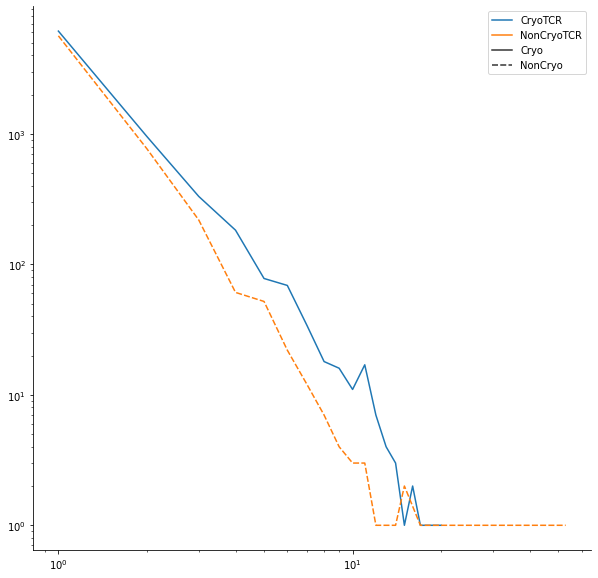

In [16]:
dict_sample_AbundanceRichness={}
list_pos=[]
for line in open(input_path+sample_info,'r'):
    info = line[:-1].split('\t')
    id = info[0]
    if id != 'Sample':
        if str(info[1]) == 'Cryo':
            list_pos.append(id)
        dict_abundance_richness={}
        read_file = open(input_path + id + '.clonotypes.ALL.txt', 'r')
        for line in read_file:
            if line[0]!='c':
                info=line[:-1].split('\t')
                abundance=info[0]
                if abundance not in dict_abundance_richness.keys():
                    dict_abundance_richness[abundance]=1
                else:
                    dict_abundance_richness[abundance]+=1
        dict_sample_AbundanceRichness[id]=dict_abundance_richness
        read_file.close()

list_abundance=[]
list_richniess=[]
list_sample=[]
list_class=[]
for sample in dict_sample_AbundanceRichness.keys():
    dict_abundance_richness=dict_sample_AbundanceRichness[sample]
    for abundance in dict_abundance_richness.keys():
        list_sample.append(sample)
        if sample in list_pos:
            list_class.append('Cryo')
        else:
            list_class.append('NonCryo')
        list_abundance.append(int(abundance))
        list_richniess.append(int(dict_abundance_richness[abundance]))

ax = sns.lineplot(x=list_abundance,y=list_richniess,hue=list_sample,style=list_class)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xscale('log')
plt.yscale('log')
plt.savefig(output_path+'Abundance_Proportion_relatplot.pdf')
plt.show()

In [17]:
#first run vdjtools CalcPairwiseDistances code
if os.path.exists('intersect.batch.aa.txt'):
    input_file_temp=open('intersect.batch.aa.txt','r')#请将带有绝对路径的CalcPairwiseDistances的输出文件写在此处的''内
    save_file_temp=open('overlapped_CDR3.txt','w')#请将带有绝对路径的输出文件写在此处的''内
    ########################################################################################################################
    list_samples=[]
    diction={}
    row=1
    for line in input_file_temp:
        if row!=1:
            info=line[:-1].split('\t')
            for sample in [info[0],info[1]]:
                if sample not in list_samples:
                    list_samples.append(sample)
            key=info[0]+'and'+info[1]
            value=info[4]
            diction[key]=value
        row+=1
    input_file_temp.close()
    word=''
    for sample in list_samples:
        sample=sample.split('.')[0]
        word+=sample+'\t'
    save_file_temp.write(word[:-1]+'\n')
    for sample_row in list_samples:
        word=''
        for sample_column in list_samples:
            if sample_row+'and'+sample_column in diction.keys():
                word+=str(diction[sample_row+'and'+sample_column])+'\t'
            else:
                if sample_column+'and'+sample_row in diction.keys():
                    word+=str(diction[sample_column+'and'+sample_row])+'\t'
                else:
                    word+='0'+'\t'
        word=word[:-1]+'\n'
        save_file_temp.write(word)
    save_file_temp.close()
else:
    print('intersect.batch.aa.txt did not exist!')

intersect.batch.aa.txt did not exist!


In [18]:
if os.path.exists('overlapped_CDR3.txt'):
    input_file_temp='overlapped_CDR3.txt'#请将带有绝对路径的输入文件写在此处的''内
    output_file_temp='overlapped_CDR3.pdf'#请将带有绝对路径的输出文件写在此处的''内
    ########################################################################################################################
    list_samples=[]
    list_value_list=[]
    number_row=1
    for line in open(input_file_temp):
        if number_row!=1:
            list_value=[]
            index=0
            for value in line[:-1].split('\t'):
                list_value.append(float(value))
                index+=1
            list_value_list.append(list_value)
        else:
            for sample in line[:-1].split('\t'):
                list_samples.append(sample)
        number_row+=1
    data=pd.DataFrame(data=list_value_list,index=list_samples,columns=list_samples)
    ax=sns.clustermap(data,standard_scale=1,figsize=(10,10))
    plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)
    plt.savefig(output_file_temp)
    plt.show()
else:
    print('overlapped_CDR3.txt did not exist!')

overlapped_CDR3.txt did not exist!


In [19]:
def Shannon_entropy(list_frequency):
    sum=0
    for frequency in list_frequency:
        sum+=frequency*math.log(frequency)
    H=-sum
    return H

def Pielou_evenness(H,richness):
    E=H/math.log(richness)
    return E

def Clonality(E):
    C=1-E
    return C

['Cryo', 'Cryo', 'Cryo', 'NonCryo', 'NonCryo', 'NonCryo']


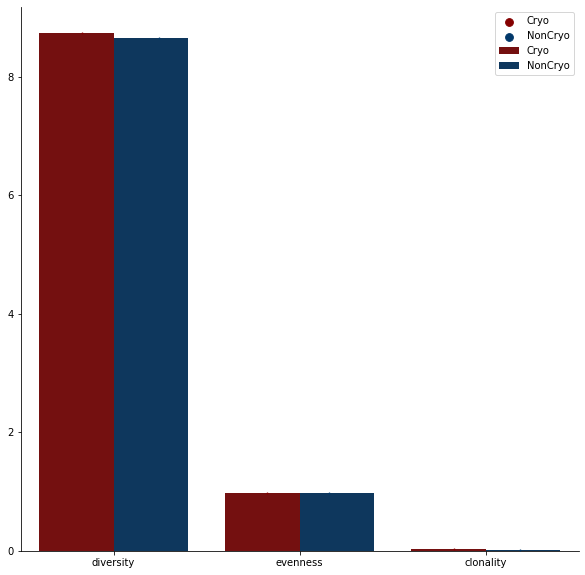

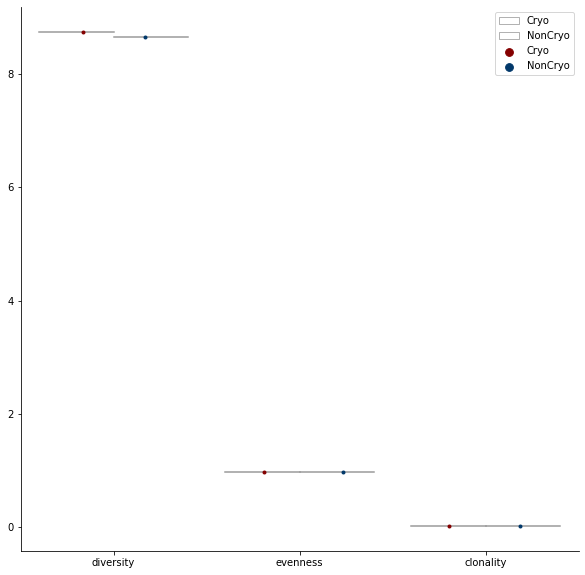

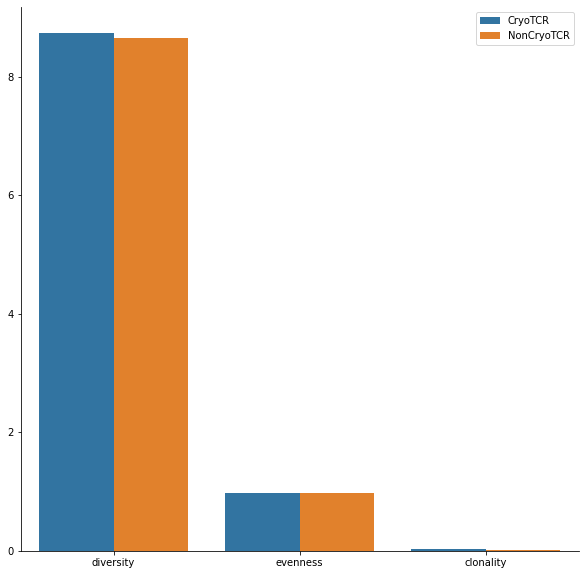

In [20]:
list_pos=[]
list_characteristic=[]
list_value=[]
list_sample=[]
list_class=[]
for line in open(input_path+sample_info,'r'):
    info = line[:-1].split('\t')
    id = info[0]
    if id != 'Sample':
        if info[1] == 'Cryo':
            list_pos.append(id)
        read_file = open(input_path + id + '.clonotypes.ALL.txt', 'r')
        richness=0
        TotalCount=0
        for line in read_file:
            if line[0] != 'c':
                count = int(line[:-1].split('\t')[0])
                richness+=1
                TotalCount+=count
        read_file.close()
        read_file = open(input_path + id + '.clonotypes.ALL.txt', 'r')
        list_frequency = []
        for line in read_file:
            if line[0] != 'c':
                count = int(line[:-1].split('\t')[0])
                list_frequency.append(count/TotalCount)
        diversity=Shannon_entropy(list_frequency)
        evenness=Pielou_evenness(diversity,richness)
        clonality=Clonality(evenness)
        list_characteristic+=['diversity','evenness','clonality']
        list_value+=[diversity,evenness,clonality]
        for time in range(0,3):
            list_sample.append(id)
            if id in list_pos:
                list_class.append('Cryo')
            else:
                list_class.append('NonCryo')
        read_file.close()

print(list_class)
ax1 = sns.barplot(x=list_characteristic,y=list_value,hue=list_class,errwidth=0.5,capsize=0.3,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1_1 = sns.stripplot(x=list_characteristic,y=list_value,size=2,hue=list_class,dodge=True,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig(output_path+'diversity_evenness_clonality_barplot_class.pdf')
plt.show()

ax2 = sns.violinplot(x=list_characteristic,y=list_value,hue=list_class,palette=('white','white'))
ax2_1 = sns.stripplot(x=list_characteristic,y=list_value,size=4,hue=list_class,dodge=True,palette=(sns.xkcd_rgb["dark red"],sns.xkcd_rgb["marine blue"]))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.savefig(output_path+'diversity_evenness_clonality_violinplot_class.pdf')
plt.show()

ax3 = sns.barplot(x=list_characteristic,y=list_value,hue=list_sample,errwidth=0.5,capsize=0.5)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.savefig(output_path+'diversity_evenness_clonality_sample.pdf')
plt.show()

In [21]:
list_files=[]
for line in open(path+sample_info,'r'):
    if line[0]!='S':
        file=line.split('\t')[0]
        list_files.append(file+file_suffix)

list_sample=[]
list_V=[]
list_J=[]
list_dict_V=[]
list_dict_J=[]
for file in list_files:
    read_file=open(path+file,'r')
    sample=file.split('.')[0]
    list_sample.append(sample)
    dict_CDR={}
    dict_V={}
    dict_J={}
    for line in read_file:
        if line[0]!='c':
            info=line[:-1].split('\t')
            name_V=info[4]
            name_J=info[6]
            if name_V not in list_V:
                list_V.append(name_V)
            if name_J not in list_J:
                list_J.append(name_J)
            if name_V not in dict_V.keys():
                dict_V[name_V]=1
            else:
                dict_V[name_V]+=1
            if name_J not in dict_J.keys():
                dict_J[name_J]=1
            else:
                dict_J[name_J]+=1
    list_dict_V.append(dict_V)
    list_dict_J.append(dict_J)
    read_file.close()

word = 'item'
for sample in list_sample:
    word+='\t'+sample
word+='\n'
V_file=open(path+'/matrix_V.txt','w')
V_file.write(word)
for V in list_V:
    check = []
    info=str(V)
    for dict_V in list_dict_V:
        if V in dict_V.keys():
            info+='\t'+str(dict_V[V])
            check.append(float(dict_V[V]))
        else:
            info+='\t'+'0'
            check.append(0)
    info+='\n'
    if max(check)!=0:
        V_file.write(info)
V_file.close()
print('V gene expression matrix have been build!')
J_file=open(path+'/matrix_J.txt','w')
J_file.write(word)
for J in list_J:
    check = []
    info=str(J)
    for dict_J in list_dict_J:
        if J in dict_J.keys():
            info+='\t'+str(dict_J[J])
            check.append(float(dict_J[J]))
        else:
            info+='\t'+'0'
            check.append(0)
    info+='\n'
    if max(check)!=0:
        J_file.write(info)
J_file.close()
print('J gene expression matrix have been build!')
print('expression matrix have been build!')

V gene expression matrix have been build!
J gene expression matrix have been build!
expression matrix have been build!


In [11]:
!Rscript /mnt/e/Cryo-TCR/data/TCR_data/diff_analysis.r V $(pwd) $(pwd) $sample_info
!Rscript /mnt/e/Cryo-TCR/data/TCR_data/diff_analysis.r J $(pwd) $(pwd) $sample_info

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Attaching package: ‘S4Vectors’

The following objec

converting counts to integer mode
Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship

out of 112 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 7, 6.2%
LFC < 0 (down)     : 15, 13%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 1)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following

converting counts to integer mode
Warning message:
In DESeqDataSet(se, design = design, ignoreRank) :
  some variables in design formula are characters, converting to factors
estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship

out of 55 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 1, 1.8%
LFC < 0 (down)     : 5, 9.1%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 17)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [23]:
#first run R code with Deseq2 analysis
if os.path.exists('diffexp_result_J.txt'):
    input_file_temp='diffexp_result_J.txt'#请将带有绝对路径的输入文件写在此处的''内
    output_file_temp='diffexp_VolcanoPlot_J.pdf'#请将带有绝对路径的输出文件写在此处的''内
    ########################################################################################################################
    list_log2FC=[]
    list_padj=[]
    index_log2FC=2
    index_padj=6
    number_row=1
    for line in open(input_file_temp):
        if number_row==1:
            index_log2FC=line[:-1].split('\t').index('log2FoldChange')
            index_padj=line[:-1].split('\t').index('padj')
        else:
            if line.split('\t')[index_log2FC]!='NA' and line.split('\t')[index_padj]!='NA':
                list_log2FC.append(float(line.split('\t')[index_log2FC]))
                list_padj.append(float(line.split('\t')[index_padj]))
        number_row+=1
    foldchange=np.asarray(list_log2FC)
    pvalue=np.asarray(list_padj)

    result = pd.DataFrame({'pvalue': pvalue, 'FoldChange': foldchange})
    result['log(pvalue)'] = -np.log10(result['pvalue'])
    result['sig'] = 'normal'
    result['size'] = np.abs(result['FoldChange']) / 10

    result.loc[(result.FoldChange > 0) & (result.pvalue < 0.05), 'sig'] = 'up'
    result.loc[(result.FoldChange < 0) & (result.pvalue < 0.05), 'sig'] = 'down'

    ax = sns.scatterplot(x="FoldChange", y="log(pvalue)",hue='sig',hue_order = ('up','down','normal'),palette=("#E41A1C","#377EB8","grey"),data=result)
    ax.set_ylabel('-log10Padj',fontweight='bold')
    ax.set_xlabel('log2FoldChange',fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(output_file_temp)
    plt.show()
else:
    print('diffexp_result_J.txt did not exist!')

diffexp_result_J.txt did not exist!


In [24]:
#first run R code with Deseq2 analysis
if os.path.exists('diffexp_result_V.txt'):
    input_file_temp='diffexp_result_V.txt'#请将带有绝对路径的输入文件写在此处的''内
    output_file_temp='diffexp_VolcanoPlot_V.pdf'#请将带有绝对路径的输出文件写在此处的''内
    ########################################################################################################################
    list_log2FC=[]
    list_padj=[]
    index_log2FC=2
    index_padj=6
    number_row=1
    for line in open(input_file_temp):
        if number_row==1:
            index_log2FC=line[:-1].split('\t').index('log2FoldChange')
            index_padj=line[:-1].split('\t').index('padj')
        else:
            if line.split('\t')[index_log2FC]!='NA' and line.split('\t')[index_padj]!='NA':
                list_log2FC.append(float(line.split('\t')[index_log2FC]))
                list_padj.append(float(line.split('\t')[index_padj]))
        number_row+=1
    foldchange=np.asarray(list_log2FC)
    pvalue=np.asarray(list_padj)

    result = pd.DataFrame({'pvalue': pvalue, 'FoldChange': foldchange})
    result['log(pvalue)'] = -np.log10(result['pvalue'])
    result['sig'] = 'normal'
    result['size'] = np.abs(result['FoldChange']) / 10

    result.loc[(result.FoldChange > 0) & (result.pvalue < 0.05), 'sig'] = 'up'
    result.loc[(result.FoldChange < 0) & (result.pvalue < 0.05), 'sig'] = 'down'

    ax = sns.scatterplot(x="FoldChange", y="log(pvalue)",hue='sig',hue_order = ('up','down','normal'),palette=("#E41A1C","#377EB8","grey"),data=result)
    ax.set_ylabel('-log10Padj',fontweight='bold')
    ax.set_xlabel('log2FoldChange',fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.savefig(output_file_temp)
    plt.show()
else:
    print('diffexp_result_V.txt did not exist!')

diffexp_result_V.txt did not exist!


In [26]:
if os.path.exists('diffexp_result_V.txt'):
    input_file_temp='diffexp_result_V.txt'#请将带有绝对路径的输入文件写在此处的''内
    output_file_temp='diffexp_heatmap_V.pdf'#请将带有绝对路径的输出文件写在此处的''内
    ########################################################################################################################
    list_pos=[]
    for line in open(sample_info,'r'):
        info=line[:-1].split('\t')
        if info[0]!='Sample':
            if str(info[1])=='Cryo':
                list_pos.append(info[0])

    list_ids=[]
    list_samples=[]
    list_value_list=[]
    list_sample_colors=[]
    list_gene_colors=[]
    begin_samples=7
    index_log2FC=2
    index_p=6
    number_row=1
    for line in open(input_file_temp):
        if number_row!=1:
            list_ids.append(line[:-1].split('\t')[0])
            list_value=[]
            for value in line[:-1].split('\t')[begin_samples:]:
                list_value.append(float(value))
            list_value_list.append(list_value)
            log2FC=float(line[:-1].split('\t')[index_log2FC])
            p_temp=line[:-1].split('\t')[index_p]
            if p_temp == 'NA':
                p=1
            else:
                p=float(p_temp)
            if p<0.05 and log2FC>0:
                list_gene_colors.append(sns.xkcd_rgb["dark red"])
                print(line[:-1].split('\t')[begin_samples:])
            elif p<0.05 and log2FC<=0:
                list_gene_colors.append(sns.xkcd_rgb["marine blue"])
            else:
                list_gene_colors.append(sns.xkcd_rgb["grey"])
        else:
            begin_samples = line[:-1].split('\t').index('padj') + 1
            index_log2FC = line[:-1].split('\t').index('log2FoldChange')
            index_padj = line[:-1].split('\t').index('padj')
            for sample in line[:-1].split('\t')[begin_samples:]:
                list_samples.append(sample)
                if sample in list_pos:
                    list_sample_colors.append(sns.xkcd_rgb["dark red"])
                else:
                    list_sample_colors.append(sns.xkcd_rgb["marine blue"])
        number_row+=1
    print(len(list_sample_colors))
    print(len(list_gene_colors))
    data=pd.DataFrame(data=list_value_list,index=list_ids,columns=list_samples)
    print(data)
    ax=sns.clustermap(data,standard_scale=1,row_colors=list_gene_colors,col_colors=list_sample_colors)
    plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)
    plt.savefig(output_file_temp)
    plt.show()
else:
    print('diffexp_result_V.txt did not exist!')

diffexp_result_V.txt did not exist!


In [27]:
if os.path.exists('diffexp_result_J.txt'):
    input_file_temp='diffexp_result_J.txt'#请将带有绝对路径的输入文件写在此处的''内
    output_file_temp='diffexp_heatmap_J.pdf'#请将带有绝对路径的输出文件写在此处的''内
    ########################################################################################################################
    list_pos=[]
    for line in open(sample_info,'r'):
        info=line[:-1].split('\t')
        if info[0]!='Sample':
            if str(info[1])=='Cryo':
                list_pos.append(info[0])

    list_ids=[]
    list_samples=[]
    list_value_list=[]
    list_sample_colors=[]
    list_gene_colors=[]
    begin_samples=7
    index_log2FC=2
    index_p=6
    number_row=1
    for line in open(input_file_temp):
        if number_row!=1:
            list_ids.append(line[:-1].split('\t')[0])
            list_value=[]
            for value in line[:-1].split('\t')[begin_samples:]:
                list_value.append(float(value))
            list_value_list.append(list_value)
            log2FC=float(line[:-1].split('\t')[index_log2FC])
            p_temp=line[:-1].split('\t')[index_p]
            if p_temp == 'NA':
                p=1
            else:
                p=float(p_temp)
            if p<0.05 and log2FC>0:
                list_gene_colors.append(sns.xkcd_rgb["dark red"])
            elif p<0.05 and log2FC<=0:
                list_gene_colors.append(sns.xkcd_rgb["marine blue"])
            else:
                list_gene_colors.append(sns.xkcd_rgb["grey"])

        else:
            begin_samples = line[:-1].split('\t').index('padj') + 1
            index_log2FC = line[:-1].split('\t').index('log2FoldChange')
            index_padj = line[:-1].split('\t').index('padj')
            for sample in line[:-1].split('\t')[begin_samples:]:
                list_samples.append(sample)
                if sample in list_pos:
                    list_sample_colors.append(sns.xkcd_rgb["dark red"])
                else:
                    list_sample_colors.append(sns.xkcd_rgb["marine blue"])
        number_row+=1
    print(len(list_sample_colors))
    print(len(list_gene_colors))
    data=pd.DataFrame(data=list_value_list,index=list_ids,columns=list_samples)
    print(data)
    ax=sns.clustermap(data,standard_scale=1,row_colors=list_gene_colors,col_colors=list_sample_colors)
    plt.setp(ax.ax_heatmap.xaxis.get_majorticklabels(), rotation=45)
    plt.savefig(output_file_temp)
    plt.show()
else:
    print('diffexp_result_J.txt did not exist!')

diffexp_result_J.txt did not exist!
